## Instructions

1. Do not write your name on the assignment. Be careful about any warnings that might display some file path with your name included.

2. You may talk to a friend, discuss the questions and potential directions for solving them. However, you need to write your own solutions and code separately, and not as a group activity.

3. You are expected to carefully read and comply with the [generative AI policy](https://canvas.northwestern.edu/courses/233157/pages/generative-ai-policy?module_item_id=3421526) of this course.

4. Write your code in the *Code* cells and print the instructed output. If you are instructed to explain something in words, write your answer in the *Markdown* cells of the Jupyter notebook. Ensure that the solution is coded and/or written neatly enough to understand and grade.

5. Use [Quarto](https://quarto.org/docs/output-formats/html-basics.html) to render the *.ipynb* file as HTML. You will need to open the command prompt, navigate to the directory containing the file, and use the command: `quarto render filename.ipynb --to html`. Submit the HTML file.

6. This assignment is worth 100 points and is due on **May 1, 2025 at 11:59 pm**. 

7. **Five points given for properly formatting the assignment**. The breakdown is as follows:
- The submission must be an HTML file rendered using Quarto. (1 point).
- Your name should not be visible in the HTML file (including the file path in any warning that your code returns). (1 point)
- There are not excessively long outputs of extraneous information. (e.g. no printouts of entire data frames without good reason; there are not long printouts of which iteration a loop is on; there are not long sections of commented-out code, etc.) (1 point)
- Final answers for each question are written in Markdown cells. (1 point).
- There is no piece of unnecessary / redundant code, and no unnecessary / redundant text. (1 point)

In [1]:
import time

## 1) Tuning a KNN Classifier with Scikit-Learn Tools (70 points)

In this question, you will use **classification_data.csv**. Each observation is a loan and each variable represents some financial information as follows:

- `hi_int_prncp_pd`: Indicates if a high percentage of the repayments went to interest rather than principal. **This is the classification response.**

- `out_prncp_inv`: Remaining outstanding principal for portion of total amount funded by investors

- `loan_amnt`: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

- `int_rate`: Interest rate on the loan

- `term`: The number of total payments on the loan. Values are in months and can be either 36 or 60.

As indicated above, `hi_int_prncp_pd` is the response and all the remaining columns are predictors. You will tune and train a K-Nearest Neighbors (KNN) classifier throughout this question.

### a)

Read the dataset. **(0.5 points)**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import TunedThresholdClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

classification_data = pd.read_csv("/Users/vaibhavrangan/Downloads/Stat_303-3/Datasets/classification_data.csv")

### b)

Create the predictors and the response as two separate variables. **(0.5 points)**

In [4]:
class_x = classification_data.drop("hi_int_prncp_pd", axis = 1)
class_y = classification_data["hi_int_prncp_pd"]

### c)

Create the training and the test data with the following specifications:
- The train-test split should be 75%-25%.
- You need to ensure that the class ratio is preserved in the training and the test datasets; i.e. **the data is stratified.**
- Use `random_state=45`.

**(3 points)**

In [5]:
x_class_train, x_class_test, y_class_train, y_class_test = train_test_split(class_x, class_y, test_size = 0.25, random_state = 45, stratify = class_y)

### d)

Print the class ratios of the entire dataset, the training dataset and the test dataset to check if the class ratio is kept the same after the split in the previous part. **(2 points)**

In [7]:
print(y_class_train.value_counts(normalize=True))
print(y_class_test.value_counts(normalize=True))

hi_int_prncp_pd
0    0.813986
1    0.186014
Name: proportion, dtype: float64
hi_int_prncp_pd
0    0.813841
1    0.186159
Name: proportion, dtype: float64


### e)

Scale the training and the test datasets.

**(2 points)**

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_class_train_scaled = scaler.fit_transform(x_class_train)
x_class_test_scaled = scaler.transform(x_class_test)

### f)

Before creating and tuning a model, you need to create some cross-validation (CV) settings (as one object) to ensure the most accurate representation of the data across all the folds.

Use the following specifications for your cross-validation settings:
- Make sure the data is stratified in all the folds.
- Use 5 folds.
- Shuffle the data for more randomness.
- Use `random_state=14`.

**(3 points)**

**Use these settings for the rest of this question for consistency.**

In [10]:
cv_class = StratifiedKFold(n_splits = 5, shuffle= True, random_state=14)

### g)

Tune a KNN classifier with the following specifications:
- Use every **odd** K value between 1 and 50 (including 1).
- Fix the `weights` as `uniform`, which is the default input.
- Use the CV settings created in Part f.
- Use accuracy as the evaluation metric, which is the default setting.

**(4 points)**

Print the best average cross-validation accuracy **(2 points)** and the K value that corresponds to it. **(2 points)**

**Note:** There are two different ways to implement this part. Both are fine and should return the same results.

In [18]:
from sklearn.neighbors import KNeighborsClassifier

Ks = np.arange(1, 50, 2)

scores = []

for K in Ks:
    model = KNeighborsClassifier(n_neighbors=K, weights='uniform')
    cv_scores = cross_val_score(model, x_class_train_scaled, y_class_train, cv=cv_class, scoring='accuracy')
    scores.append(cv_scores)

avg_cv_scores = np.array(scores).mean(axis=1)
best_k = Ks[avg_cv_scores.argmax()]
print('Best avg CV score:', max(avg_cv_scores))
print('Best K:', best_k)

Best avg CV score: 0.917148138973019
Best K: 7


### h)

Using the optimal K value found in Part g, tune the decision threshold with the following specifications:

- Use all the possible decision threshold values with a stepsize of 0.01.
- Use the CV settings created in Part f.
- Use accuracy as the evaluation metric, which is the default setting.

**(4 points)**

Print the best cross-validation accuracy **(1 point)** and the threshold value that corresponds to it. **(1 points)**

**Note:** There are multiple threshold values that will return the same accuracy and the method covered in class will return the lowest threshold value among them, which is acceptable.

In [14]:
thrs = np.arange(0.01, 1, 0.01)
accuracies = []

tuned_model = KNeighborsClassifier(n_neighbors=best_k, weights='uniform')
cv_probs = cross_val_predict(tuned_model, x_class_train_scaled, y_class_train, cv=cv_class, method='predict_proba')[0:, 1]

for thr in thrs:
    cv_preds = cv_probs > thr
    accuracy = accuracy_score(y_class_train, cv_preds)
    accuracies.append(accuracy)

print('Best accuracy:', max(accuracies))
best_thr = thrs[accuracies.index(max(accuracies))]
print('Best threshold:', best_thr)
    

Best accuracy: 0.9171474728825294
Best threshold: 0.43


### i)

Is the method used in Parts g and h guaranteed to find the best K and threshold combination, i.e. tune the classifier to its best overall combination of hyperparameters and threshold? **(1 point)** Why or why not? **(1 point)**

No it is not guaranteed to find the best combination. Since we are first tuning the K value and then finding the best decision threshold for that K value, we may miss combinations of K and threshold values such that the K value has a lower average accuracy than K = 7 does.

### j)

Use the tuned classifier and the tuned threshold to find the test accuracy. **(2 points)** How does it compare to the cross-validation accuracy, i.e. is the model generalizing well? **(1 point)**

In [15]:
tuned_model.fit(x_class_train_scaled, y_class_train)
y_class_test_pred_probas = tuned_model.predict_proba(x_class_test_scaled)[:, 1]
y_class_test_pred = y_class_test_pred_probas > best_thr
print('Test accuracy:', accuracy_score(y_class_test, y_class_test_pred))


Test accuracy: 0.9134948096885813


The test accuracy is very similar (slightly lower) to the cross-validation accuracy, indicating that the model is generalizing well.

### k)

Now, you need to tune K and the threshold **at the same time**. Use the following specifications:
- Use every **odd** K value between 1 and 50 (including 1).
- Fix the `weights` as `uniform`, which is the default input.
- Use the CV settings created in Part f.
- Use accuracy as the evaluation metric, which is the default setting.
- Use all possible decision threshold values with a stepsize of 0.01.

**(6 points)**

Print the best cross-validation accuracy, and the K and threshold values that correspond to it. **(1 point)**

**Note:** There are multiple threshold values that will return the same accuracy and the method covered in class will return the lowest threshold value among them, which is acceptable.

In [22]:
Ks = np.arange(1, 50, 1)
thrs = np.arange(0.01, 1, 0.01)
cv_results = pd.DataFrame(columns=['K', 'Threshold', 'Accuracy'])
counter = 0

for K in Ks:
    model = KNeighborsClassifier(n_neighbors=K, weights='uniform')
    cv_probs = cross_val_predict(model, x_class_train_scaled, y_class_train, cv=cv_class, method='predict_proba')[:, 1]
    for thr in thrs:
        cv_preds = cv_probs > thr
        accuracy = accuracy_score(y_class_train, cv_preds)
        cv_results.loc[counter, "K"] = K
        cv_results.loc[counter, "Threshold"] = thr  
        cv_results.loc[counter, "Accuracy"] = accuracy  
        counter += 1

best_acc_index = cv_results["Accuracy"].argmax()
print(cv_results.iloc[best_acc_index])

K                  9
Threshold       0.34
Accuracy     0.92084
Name: 825, dtype: object


### l)

How does the best cross-validation accuracy in Part k compare to the cross-validation accuracy in Parts g and h? **(1 point)** Why is this the case? **(2 points)**

The best cross-validation accuracy in Part K is higher than the cross-validation accuracy in previous parts because we are looping through every possible combination of K and threshold values in Part K, which guarantees that we will find the optimal combination.

### m)

Use the tuned classifier and the tuned threshold from Part k to find the test accuracy. **(1 point)**

In [23]:
optimal_k = cv_results.iloc[best_acc_index]["K"]
optimal_thr = cv_results.iloc[best_acc_index]["Threshold"]

optimal_model = KNeighborsClassifier(n_neighbors=optimal_k, weights='uniform')
optimal_model.fit(x_class_train_scaled, y_class_train)
y_class_test_pred_probas = optimal_model.predict_proba(x_class_test_scaled)[:, 1]
y_class_test_pred = y_class_test_pred_probas > optimal_thr
print('Test accuracy:', accuracy_score(y_class_test, y_class_test_pred))

Test accuracy: 0.9134948096885813


### n)

Create a heatmap to visualize the cross-validation results from Part k in two dimensions. **The x-axis should be the K values and the y-axis should be the threshold values.**

**Note:** **This part should be implemented in one line of code for credit.** You need to remember a data visualization function and a data wrangling method from STAT 303-1.

**(2 points)**

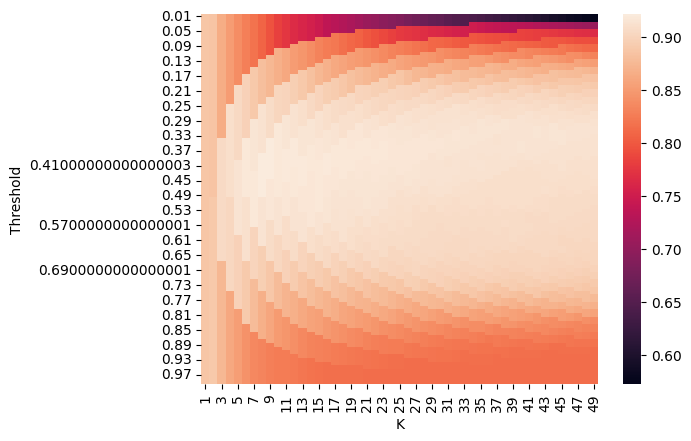

In [30]:
sns.heatmap(cv_results.pivot(index='Threshold', columns='K', values='Accuracy').astype(float));

### o)

Compare the methods you used in Parts g and h with the method you used in Part k in terms of computational power. How many K and threshold pairs did you try in each method? **(2 points)** Combining your answer in this part with your answer to Part l, explain the main trade-off of tuning a Machine Learning (ML) model. **(2 points)**

The method used in Part k is more computationally intensive than that of Parts g and h. In Part k, we loop over 5000 threshold-K combinations (50 K values x 100 thresholds) whereas we only try 125 total combinations (25 K values + 100 thresholds for chosen K value) in Parts g and h. The main trade-off of tuning an ML model is the trade-off between computational efficiency/demands and model accuracy. We can increase model accuracy at the cost of increased computational demands, and vice versa.

### p)

Tune one last KNN classifier with the the following specifications:

- Use every **odd** K value between 1 and 50 (including 1).
- Fix the `weights` as `uniform`, which is the default input.
- Use the CV settings created in Part f.
- Use accuracy, precision and recall as the three evaluation metrics **at the same time.**

Save all your results to a DataFrame and find the average cross-validation metrics.

**(6 points)**

In [62]:
from sklearn.model_selection import cross_validate

Ks = np.arange(1,50, 2)
scores = []

for K in Ks:
    model = KNeighborsClassifier(n_neighbors=K, weights='uniform')
    score = cross_validate(model, x_class_train_scaled, y_class_train, cv=cv_class, scoring=['accuracy', 'precision', 'recall'])
    scores.append({
        'K': K,
        'avg_cv_accuracy': score['test_accuracy'].mean(),
        'avg_cv_precision': score['test_precision'].mean(),
        'avg_cv_recall': score['test_recall'].mean()
    })

df_scores = pd.DataFrame(scores)
df_scores

,K,avg_cv_accuracy,avg_cv_precision,avg_cv_recall
0,1,0.886224,0.704209,0.671229
1,3,0.905609,0.760470,0.719630
2,5,0.913686,0.772815,0.759344
3,7,0.917148,0.783205,0.766812
4,9,0.916685,0.784798,0.760594
5,11,0.915993,0.785504,0.754375
6,13,0.915763,0.786470,0.750679
7,15,0.917147,0.792020,0.751913
8,17,0.913686,0.784785,0.738264
9,19,0.913455,0.785189,0.735795


### q)

Find the K value that maximizes cross-validation precision **while having a cross-validation recall above 75%.** **(3 points)** Print the average cross-validation results of this K value. **(1 point)**

In [65]:
df_filtered = df_scores[["K", "avg_cv_accuracy", "avg_cv_precision", "avg_cv_recall"]]
df_filtered2 = df_filtered[df_filtered["avg_cv_recall"] > 0.75]
print(df_filtered2.loc[df_filtered2["avg_cv_precision"].idxmax()])
k_val = df_filtered2.loc[df_filtered2["avg_cv_precision"].idxmax()]["K"]
print("K value:", k_val)

K                   15.000000
avg_cv_accuracy      0.917147
avg_cv_precision     0.792020
avg_cv_recall        0.751913
Name: 7, dtype: float64
K value: 15.0


### r)

Using the optimal K value found in Part q, tune the decision threshold with the following specifications:

- Use all possible decision threshold values with a stepsize of 0.01.
- Use the CV settings created in Part f.
- Use accuracy as the evaluation metric, which is the default setting.

**(4 points)**

Print the best cross-validation accuracy **(1 point)** and the threshold value that corresponds to it. **(1 point)**

**Note:** This is very similar to part h, but necessary for the next part.

In [67]:
thresholds = np.arange(0.01, 1, 0.01)
cv_accuracies = []
tuned_model = KNeighborsClassifier(n_neighbors= int(k_val), weights='uniform')
cv_probs = cross_val_predict(tuned_model, x_class_train_scaled, y_class_train, cv=cv_class, method='predict_proba')[:, 1]

for thr in thresholds:
    cv_preds = cv_probs > thr
    cv_accuracy = accuracy_score(y_class_train, cv_preds)
    cv_accuracies.append(cv_accuracy)

print(max(cv_accuracies))
best_thr = thresholds[cv_accuracies.index(max(cv_accuracies))]
print(best_thr)

0.9173782598661435
0.4


### s)

Use the tuned classifier and the tuned threshold from Parts q and r to find the test accuracy, test precision, test recall and test AUC. **(4 points)**

In [68]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

tuned_model.fit(x_class_train_scaled, y_class_train)
y_class_test_pred_probas = tuned_model.predict_proba(x_class_test_scaled)[:, 1]
y_class_test_pred = y_class_test_pred_probas > best_thr
print('Test accuracy:', accuracy_score(y_class_test, y_class_test_pred))
print("Test precision:", precision_score(y_class_test, y_class_test_pred))
print("Test recall:", recall_score(y_class_test, y_class_test_pred))
print("Test AUC:", roc_auc_score(y_class_test, y_class_test_pred_probas))

Test accuracy: 0.9197231833910035
Test precision: 0.7865168539325843
Test recall: 0.7806691449814126
Test AUC: 0.9336560832511442


### t)

In Part s, you should see that two metrics are considerably higher than the other two. Print the test confusion matrix **(1 point)** and use its values to explain why this is the case. **(2 points)**

Text(50.722222222222214, 0.5, 'True')

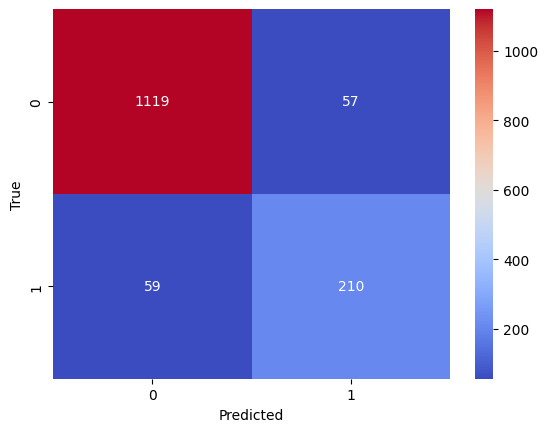

In [72]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_class_test, y_class_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('True')

Precision and recall are lower because there are a considerable number of false positives and false negatives, in comparison to the number of true positives. The false positives and false negatives don't impact accuracy or AUC because there are an overwhelmning number of true negatives.

## 2) Tuning a KNN Regressor with Scikit-Learn Tools (23 points)

In this question, you will use **regression_data.csv**. Each observation is a loan and each variable represents some financial information as follows:

- `money_made_inv`: Indicates the amount of money made by the bank on the loan. **This is the regression response.**

- `out_prncp_inv`: Remaining outstanding principal for portion of total amount funded by investors

- `loan_amnt`: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

- `int_rate`: Interest rate on the loan

- `term`: The number of total payments on the loan. Values are in months and can be either 36 or 60.

As indicated above, `money_made_inv` is the response and all the remaining columns are predictors. You will tune and train a K-Nearest Neighbors (KNN) regressor throughout this question.

### a)

Read the data. Create the predictors and the response as two separate variables. **(0.5 points)**

In [32]:
regression_data = pd.read_csv("/Users/vaibhavrangan/Downloads/Stat_303-3/Datasets/regression_data.csv")

In [33]:
reg_x = regression_data.drop("money_made_inv", axis = 1)
reg_y = regression_data["money_made_inv"]

### b) 

Create the training and the test data with the following specifications:

- The split should be 80%-20%.
- Use `random_state=1`.

**(1 points)**

In [34]:
x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(reg_x, reg_y, test_size = 0.2, random_state = 1)

### c)

Scale the training and the test datasets. **(0.5 points)**

In [35]:
x_reg_train_scaled = scaler.fit_transform(x_reg_train)
x_reg_test_scaled = scaler.transform(x_reg_test)

### d)

Create four different user-defined functions. The functions should take **one input**, named **distance**, and return `1/(1e-10+distance**n)`, where `n` should be 2, 3, 4, and 5, respectively. Note that the `1e-10` is to avoid computational overflow.

Name your functions, `dist_power_n`, where `n` should be 2, 3, 4, and 5, respectively. You can use the names of these functions as the weights input to a KNN model.

**(2.5 points)**

In [37]:
def dist_power_2(distance):
    return 1/(1e-10 + distance**2)

def dist_power_3(distance):
    return 1/(1e-10 + distance**3)

def dist_power_4(distance):
    return 1/(1e-10 + distance**4)

def dist_power_5(distance):
    return 1/(1e-10 + distance**5)

### e)

Use the following specifications for your cross-validation (CV) settings (as one object):

- Use 5 folds.
- **Repeat** the cross-validation 5 times.
- Use `random_state=10`.

**(2.5 points)**

In [40]:
from sklearn.model_selection import RepeatedKFold

cv_reg = RepeatedKFold(n_splits=5, n_repeats=5, random_state=10)

### f)

Explain the point of repeating the cross-validation 5 times, when 5 different folds are already used for cross-validation. **(2 points)**

When we repeat the cross-validation 5 times, with 5 different folds each time, we tune the model with 25 combinations and virtually guarantee that any skew or bias in the training observations will be surpressed.

### g)

**Using a grid search**, tune a KNN regressor with the following specifications:
- Use **all** K values between 1 and 20 (inclusive).
- For `weights`, use **distance**, **uniform**, and the names of the functions written in Part d. Note that the functions are just higher order versions of **distance**.
- Use the CV settings created in Part e.
- Use RMSE as the evaluation metric.
- Use `verbose=2`

**(6 points)**

Print the tuned hyperparameter values **(1 point)** and best average CV score that corresponds to them. **(1 point)** Calculate the **test** RMSE using the tuned model. **(1 point)**

**Note:** Put your code between the lines given below to measure the runtime.

In [52]:
st = time.time()

############ YOUR CODE HERE ######################
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
grid = {
    "n_neighbors": np.arange(1,21),
    "weights": ["distance", "uniform", dist_power_2, dist_power_3, dist_power_4, dist_power_5]
}
gscv = GridSearchCV(model, grid, cv=cv_reg, scoring="neg_root_mean_squared_error", verbose=2)
gscv.fit(x_reg_train_scaled, y_reg_train)
print('Best parameters:', gscv.best_params_)
print('Best Average CV score:', gscv.best_score_)

##################################################

print('Execution time:', time.time() - st, 'seconds')

Fitting 25 folds for each of 120 candidates, totalling 3000 fits
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, 

In [ ]:
y_reg_test_pred = gscv.predict(x_reg_test_scaled)
rmse = np.sqrt(mean_squared_error(y_reg_test, y_reg_test_pred))
print('Test RMSE:', rmse)

Test RMSE: 821.8594487897745


### h)

Repeat Part g with a **cheaper and randomized method.** Use **50** random combinations from the entire grid and use `random_state=10`. **(3 points)**

In [51]:
st = time.time()

############ YOUR CODE HERE ######################
from sklearn.model_selection import RandomizedSearchCV

model = KNeighborsRegressor()

grid = {
    "n_neighbors": np.arange(1,21),
    "weights": ["distance", "uniform", dist_power_2, dist_power_3, dist_power_4, dist_power_5]
}

rscv = RandomizedSearchCV(model, grid, n_iter=50, cv=cv_reg, scoring="neg_root_mean_squared_error", verbose =2 , random_state=10)
rscv.fit(x_reg_train_scaled, y_reg_train)
print('Best parameters:', rscv.best_params_)
print('Best Average CV score:', rscv.best_score_)

##################################################

print('Execution time:', time.time() - st, 'seconds')

Fitting 25 folds for each of 50 candidates, totalling 1250 fits
[CV] END n_neighbors=8, weights=<function dist_power_3 at 0x10d2922a0>; total time=   0.0s
[CV] END n_neighbors=8, weights=<function dist_power_3 at 0x10d2922a0>; total time=   0.0s
[CV] END n_neighbors=8, weights=<function dist_power_3 at 0x10d2922a0>; total time=   0.0s
[CV] END n_neighbors=8, weights=<function dist_power_3 at 0x10d2922a0>; total time=   0.0s
[CV] END n_neighbors=8, weights=<function dist_power_3 at 0x10d2922a0>; total time=   0.0s
[CV] END n_neighbors=8, weights=<function dist_power_3 at 0x10d2922a0>; total time=   0.0s
[CV] END n_neighbors=8, weights=<function dist_power_3 at 0x10d2922a0>; total time=   0.0s
[CV] END n_neighbors=8, weights=<function dist_power_3 at 0x10d2922a0>; total time=   0.0s
[CV] END n_neighbors=8, weights=<function dist_power_3 at 0x10d2922a0>; total time=   0.0s
[CV] END n_neighbors=8, weights=<function dist_power_3 at 0x10d2922a0>; total time=   0.0s
[CV] END n_neighbors=8, we

In [49]:
y_rscv_test_pred = rscv.predict(x_reg_test_scaled)
rscv_rmse = np.sqrt(mean_squared_error(y_reg_test, y_rscv_test_pred))
print('Test RMSE:', rscv_rmse)

Test RMSE: 827.3609084121169


### i)

Compare the results of Parts g and h in terms of the cross-validation and test performance, the number of hyperparameter combinations that are tried and the execution time. **(2 points)** Indicate the main trade-off between them. **(2 points)**

RSCV and GSCV produced nearly identical test RMSEs, although the test RMSE of RSCV is slightly higher than that of GSCV. RSCV fits 25 folds for 50 randomly chosen combinations of hyperparameters, resulting in 1250 total fits. GSCV fit 25 folds for all 120 combinations (6 weight functions x 20 possible K values), resulting in 3000 total fits. Because GSCV made 1750 more fits than RSCV, it took 8 more seconds to run. This demonstrates the tradeoff between GridSearch and RandomizedSearch: you give up some accuracy in favor of speed when you opt for RandomizedSearch.